# CS4243 Lab 1: Template Matching

- The functions to be implemented are given in `lab1.py`, along with the instructions for each function. You need to fill in the codes which start with `###Your code here###` and end with `###`
- The test images are given in folder "inputs".
- Most of these functions are available in build-in libraries, but you are not allowed to use them in this assignment, only numpy is allowed except `numpy.pad()`.
- Apart from the pdf instructions, we provide a detailed instruction for each function in `lab1.py`. Please check these instructions if you find it difficult to implement the codes.

**Attention:**
- Please be careful about the data type of the image!
- Please use python with version >= 3.5.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the input arguments of the functions in `lab1.py`, otherwise your implementation would fail to pass the test.
- Except for the input parameters of `non_maximum_suppression`, please do not change other codes in this notebook

1. **Image preprossessing** 15% (rgb2gray, gray2grad, pad_zeros)
2. **Normalized Cross Correlation** 30% (normalized_cross_correlation, normalized_cross_correlation_fast, normalized_cross_correlation_matrix)
3. **Non-maximum Suppression** 10% (non_max_supression) 
4. **Template Matching** 45% (normalized_cross_correlation_ms, 5 short answer questions)

## Part 1 Image preprossessing (15%)
+ rgb2gray: 5 points
+ gray2grad: 5 points
+ pad_zeros: 5 points

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'wallpaper.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))

# RGB image to grayscale image
img_gray = lab1.rgb2gray(img)
# Grayscale image to gradient image
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
# Padding
img_pad = lab1.pad_zeros(img, 20, 20, 20, 20)

lab1.show_imgs([img, img_gray, img_grad_h, img_grad_v, img_grad_d1, img_grad_d2, img_pad])

# For evaluation purpose
sobelh = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], dtype = float)
img_grad_h_cv2 = cv2.filter2D(img_gray.astype(float), -1, cv2.flip(sobelh, -1), borderType=cv2.BORDER_CONSTANT)
print('Relative error of gray2grad() (<1e-8 will be fine):', np.linalg.norm(img_grad_h - img_grad_h_cv2))

NameError: name 'img_gray' is not defined

## Part 2 Normalized Cross-Correlation (30%)

+ normalized_cross_correlation: 10 points
+ normalized_cross_correlation_fast: 10 points
+ normalized_cross_correlation_matrix: 10 points

(120, 160, 3)
(243,) (17024, 243)
[[16.8123883  16.77670824 16.69085587 ... 15.89181539 15.89244767
  15.9722204 ]
 [16.68226407 16.68740293 16.61571297 ... 15.95612673 15.98703018
  16.04419704]
 [16.53482744 16.53649432 16.47877458 ... 16.05060262 16.08659158
  16.17462313]
 ...
 [15.25839018 15.27702703 15.28754707 ... 15.20333308 15.24687183
  15.2637528 ]
 [15.26762365 15.25479372 15.22545554 ... 15.27468272 15.25702095
  15.25820045]
 [15.47877461 15.45015017 15.37563529 ... 15.36218502 15.30566051
  15.28888482]]
[[1889.3365176  1867.98238068 1813.00760993 ... 1863.31091991
  1884.96761871 1899.09251313]
 [1802.89489068 1782.24249855 1721.02123023 ... 1913.77486151
  1938.14456548 1947.29215375]
 [1719.52755666 1691.41011125 1620.09228832 ... 1922.92482798
  1950.87684715 1966.00063414]
 ...
 [1007.22406907 1010.67727781 1049.73238469 ... 1281.28928686
  1279.14018197 1276.99212444]
 [1002.05155737 1007.21210983 1047.16015706 ... 1301.19741397
  1293.99183663 1288.25755509]
 [10

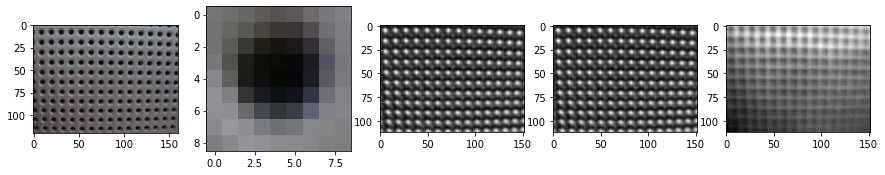

In [112]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25) # downsample the input image to save computation cost
template = img[5:14, 5:14]

t1 = time.time()
response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()

print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))


lab1.show_imgs([img, template, response, response_fast, response_matrix])

# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))

## Part 3 Non-maximum Suppression (10%)

+ non_max_suppression: 10 points

In [104]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:52, 22:52]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

# perform template matching
response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

/Users/farrellnah/Projects/CS4243/CS4243-Labs/lab1/lab1.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  for w in range(Wt, Wi - Wt):


ValueError: operands could not be broadcast together with shapes (31,31,3) (30,30,3) 

## Part 4 Study on Template Matching (45%)

### 4.1 Image Inputs (5%)
No question in this part. You will get full marks if you achieve similar results.

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'window.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[190:302, 110:193]

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = lab1.rgb2gray(template)

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = img_gray[190:302, 110:193]

# RGB to gradient map
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
img_grad = np.stack([img_grad_h, img_grad_v, img_grad_d1, img_grad_d2], -1)
template_grad = img_grad[190:302, 110:193]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_gray_pad = lab1.pad_zeros(img_gray, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_grad_pad = lab1.pad_zeros(img_grad, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_gray = lab1.normalized_cross_correlation_fast(img_gray_pad, template_gray)
response_grad = lab1.normalized_cross_correlation_fast(img_grad_pad, template_grad)



lab1.show_imgs([img, template, response])
lab1.show_imgs([img_gray, template_gray, response_gray])
lab1.show_imgs([img_grad[:,:,0], img_grad[:,:,1], img_grad[:,:,2], img_grad[:,:,3], response_grad])

# !!! Adjust the suppress range or threshold if you fail to detect 4x5 repetitive patterns in the image for RGB and grayscale inputs
res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

res_gray = lab1.non_max_suppression(response_gray, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res_gray, img_ori=img)

res_grad = lab1.non_max_suppression(response_grad, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.3)
lab1.show_img_with_squares(res_grad, img_ori=img)

### 4.2 Template Inputs (6%)

+ Q&A: 6 points

Q: Explain why their response positions are different.

A: (insetrt you answer here) 

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)


data_dir = 'inputs'
filename = 'building.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[425:491, 230:283]
template2 = img[394:460, 430:480]
template3 = img[400:466, 415:470]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, template, response])
lab1.show_imgs([img, template2, response2])
lab1.show_imgs([img, template3, response3])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res3, img_ori=img)

### 4.3 Template Size (6%）

+ Q&A: 6 points

Q1: How can each of these templates to detect every hole present in the input image? 

A1: (insetrt you answer here) 

Q2: Analyze and explain the subtle differences in the output borders.

A2: (insetrt you answer here)

Q3: Describe the correlation output with templates with a 1x1.5 or a 1x2 array of holes.

A3: (insetrt you answer here)

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:52, 22:52]
template2 = img[22:52, 22:140]
template3 = img[22:140, 22:52]
template4 = img[22:140, 22:140]


# Template 1x1
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x3
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

# Template 3x1
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

# Template 3x3
pad_height_bef, pad_height_aft = template4.shape[0] // 2 - (1 if template4.shape[0] % 2 == 0 else 0), template4.shape[0] // 2
pad_width_bef, pad_width_aft = template4.shape[1] // 2 - (1 if template4.shape[1] % 2 == 0 else 0), template4.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response4 = lab1.normalized_cross_correlation_fast(img_pad, template4)

lab1.show_imgs([img, template, template2, template3, template4], titles=['Input image', '1x1 hole', '1x3 holes', '3x1 holes', '3x3 holes'])
lab1.show_imgs([response, response2, response3, response4])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res3, img_ori=img)

res4 = lab1.non_max_suppression(response4, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res4, img_ori=img)

### 4.4 Mean-subtracted cross correlation (16%)

+ normalized_cross_correlation_ms: 10 points
+ Q&A: 6 points

Q: What are the benefits of subtracting the mean?

A: (insetrt you answer here) 

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:55, 22:55]


# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_ms = lab1.normalized_cross_correlation_ms(img_pad, template)

lab1.show_imgs([img, template, response, response_ms])

response_cv2 = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img_pad, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)
res_ms = lab1.non_max_suppression(response_ms, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_squares(res_ms, img_ori=img)

### 4.5 Auto-Correlation (6%)

+ Q&A: 6 points

Q: Explain why the correlation output responses decrease as one gets further away from the center of the output.

A: (insetrt you answer here) 

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img.copy()

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (26, 26), threshold=0.6)
lab1.show_img_with_squares(res, img_ori=img)

### 4.6 Limitations (6%)

+ Q&A: 6 points

Q: Observe the outputs and explain why template matching fails in certain regions of the image.

A: (insetrt you answer here) 

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'fence.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[310:365, 295:345]
# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])


res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.5), int(template.shape[1] * 0.5)), threshold=0.8)
lab1.show_img_with_squares(res, img_ori=img)


**Congrats! You have completed all tasks for lab 1.**